In [ ]:
import numpy as np

# XOR dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=np.float32)

y = np.array([[0],
              [1],
              [1],
              [0]], dtype=np.float32)

print("Inputs:\n", X)
print("Outputs:\n", y)


Inputs:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Outputs:
 [[0.]
 [1.]
 [1.]
 [0.]]


# XOR USING KERAS


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [133]:
keras_models = []
keras_results = []


neurons_list = [2]
learning_rates = [0.0001, 0.05]

for neurons in neurons_list:
    for lr in learning_rates:

        model = Sequential([
            Dense(neurons, input_dim=2, activation='tanh'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(
            loss='binary_crossentropy',
            optimizer=Adam(learning_rate=lr),
            metrics=['accuracy']
        )

        # Train longer to avoid degenerate solution
        model.fit(X, y, epochs=500, verbose=0)

        loss, acc = model.evaluate(X, y, verbose=0)
        predictions = np.round(model.predict(X, verbose=0)).astype(int).flatten()

        keras_models.append(model)
        keras_results.append((neurons, lr, acc))

        print(f"\n[Keras] Neurons={neurons}, LR={lr}")
        print("Predicted XOR Output:", predictions)
        print("Accuracy:", acc)



[Keras] Neurons=2, LR=0.0001
Predicted XOR Output: [0 1 1 1]
Accuracy: 0.75

[Keras] Neurons=2, LR=0.05
Predicted XOR Output: [0 1 1 0]
Accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt

def plot_decision_boundary_keras(model, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(-0.5, 1.5, 400),
        np.linspace(-0.5, 1.5, 400)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]


    probs = model.predict(grid, verbose=0).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=50, cmap='coolwarm', alpha=0.8)
    plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)

    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=100, edgecolors='k')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title(title)
    plt.colorbar(label="Predicted Probability")
    plt.show()


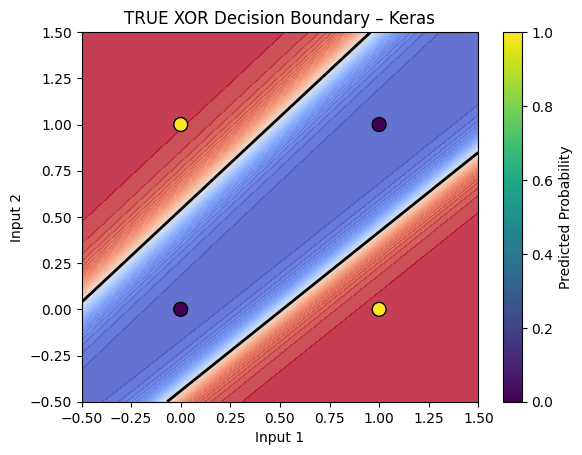

In [ ]:
plot_decision_boundary_keras(
    keras_models[0],
    X,
    y,
    "TRUE XOR Decision Boundary – Keras"
)


# USING PYTORCH

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


/tmp/ipython-input-1171478201.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/tmp/ipython-input-1171478201.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [ ]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [ ]:
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [50, 100, 500,1000]

accuracies = []
loss_curves = []
labels = []


In [ ]:
for lr in learning_rates:
    for epochs in epochs_list:
        model = XORModel()

        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        losses = []

        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

        # Evaluate accuracy
        with torch.no_grad():
            predictions = torch.round(model(X))
            accuracy = (predictions == y).float().mean().item()

        accuracies.append(accuracy)
        loss_curves.append(losses)
        labels.append(f"LR={lr}, Epochs={epochs}")

        print(f"\nLR={lr}, Epochs={epochs}")
        print("Predicted XOR Output:", predictions.numpy().flatten())
        print("Accuracy:", accuracy)



LR=0.001, Epochs=50
Predicted XOR Output: [1. 1. 0. 0.]
Accuracy: 0.5

LR=0.001, Epochs=100
Predicted XOR Output: [0. 0. 1. 0.]
Accuracy: 0.75

LR=0.001, Epochs=500
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.001, Epochs=1000
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.01, Epochs=50
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.01, Epochs=100
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.01, Epochs=500
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.01, Epochs=1000
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.1, Epochs=50
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.1, Epochs=100
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.1, Epochs=500
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

LR=0.1, Epochs=1000
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0


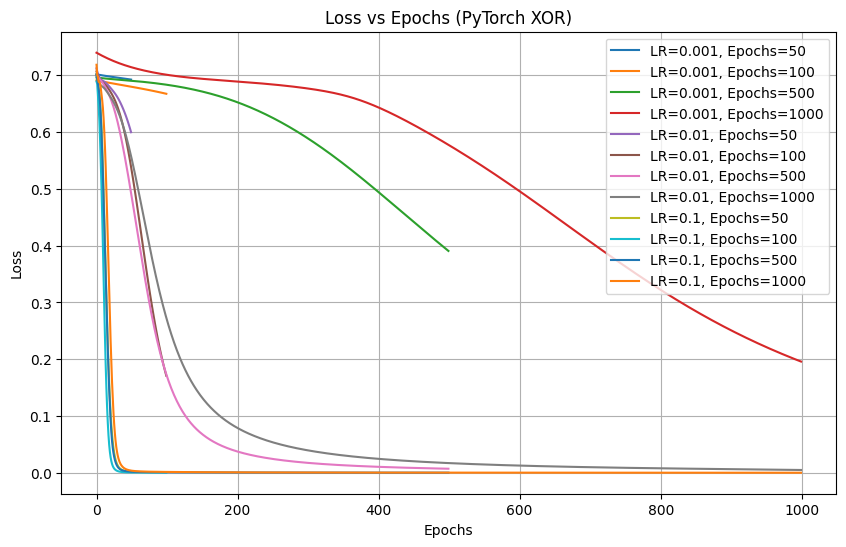

In [ ]:
plt.figure(figsize=(10,6))

for i in range(len(loss_curves)):
    plt.plot(loss_curves[i], label=labels[i])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (PyTorch XOR)")
plt.legend()
plt.grid(True)
plt.show()


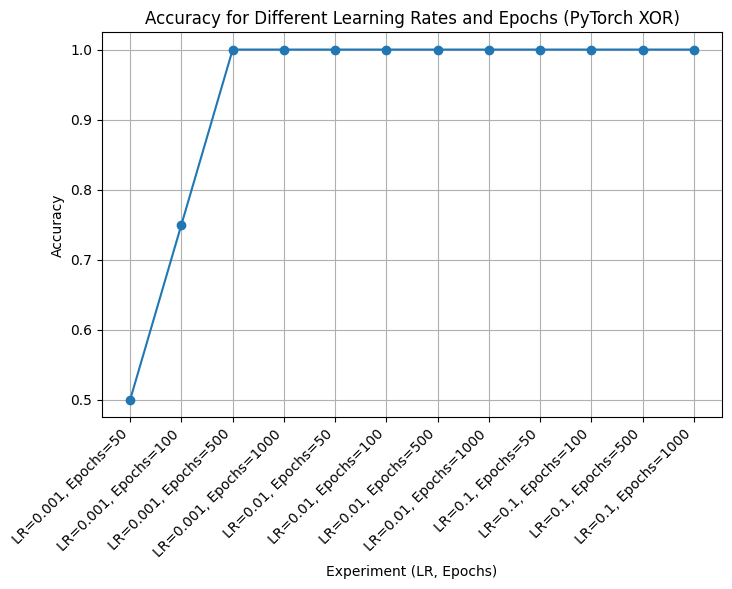

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(len(accuracies)), accuracies, marker='o')
plt.xticks(range(len(accuracies)), labels, rotation=45, ha='right')
plt.xlabel("Experiment (LR, Epochs)")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Learning Rates and Epochs (PyTorch XOR)")
plt.grid(True)
plt.show()


In [ ]:
def plot_decision_boundary_pytorch(model, X, y, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        Z = model(grid_tensor)
        Z = torch.round(Z).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(),
                c=y.flatten().numpy(), edgecolors='k')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title(title)
    plt.show()


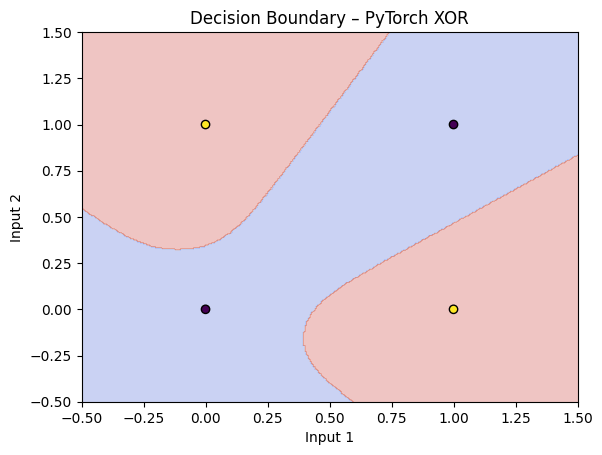

In [ ]:
plot_decision_boundary_pytorch(
    model,
    X,
    y,
    "Decision Boundary – PyTorch XOR"
)


# USING TENSFLOW





In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
learning_rates = [0.001, 0.01]
epochs_list = [100, 500]
neurons_list = [2, 4, 8]

accuracies = []
labels = []
loss_histories = []


In [ ]:
for neurons in neurons_list:
    for lr in learning_rates:
        for epochs in epochs_list:

            # Xavier (Glorot) initialization
            initializer = tf.keras.initializers.GlorotUniform()

            W1 = tf.Variable(initializer(shape=(2, neurons)))
            b1 = tf.Variable(tf.zeros([neurons]))

            W2 = tf.Variable(initializer(shape=(neurons, 1)))
            b2 = tf.Variable(tf.zeros([1]))

            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            loss_fn = tf.keras.losses.BinaryCrossentropy()

            losses = []

            # Training loop
            for epoch in range(epochs):
                with tf.GradientTape() as tape:
                    hidden = tf.nn.tanh(tf.matmul(X, W1) + b1)
                    output = tf.nn.sigmoid(tf.matmul(hidden, W2) + b2)
                    loss = loss_fn(y, output)

                grads = tape.gradient(loss, [W1, b1, W2, b2])
                optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2]))

                losses.append(loss.numpy())

            # Accuracy
            predictions = tf.round(output)
            accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y), tf.float32)).numpy()

            accuracies.append(accuracy)
            loss_histories.append(losses)

            label = f"N={neurons}, LR={lr}, Ep={epochs}"
            labels.append(label)

            print("\n", label)
            print("Predicted XOR Output:", predictions.numpy().flatten())
            print("Accuracy:", accuracy)



 N=2, LR=0.001, Ep=100
Predicted XOR Output: [0. 1. 1. 1.]
Accuracy: 0.75

 N=2, LR=0.001, Ep=500
Predicted XOR Output: [0. 1. 1. 1.]
Accuracy: 0.75

 N=2, LR=0.01, Ep=100
Predicted XOR Output: [0. 0. 1. 1.]
Accuracy: 0.5

 N=2, LR=0.01, Ep=500
Predicted XOR Output: [0. 0. 1. 1.]
Accuracy: 0.5

 N=4, LR=0.001, Ep=100
Predicted XOR Output: [0. 0. 1. 1.]
Accuracy: 0.5

 N=4, LR=0.001, Ep=500
Predicted XOR Output: [0. 0. 1. 1.]
Accuracy: 0.5

 N=4, LR=0.01, Ep=100
Predicted XOR Output: [0. 1. 1. 1.]
Accuracy: 0.75

 N=4, LR=0.01, Ep=500
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

 N=8, LR=0.001, Ep=100
Predicted XOR Output: [0. 0. 1. 1.]
Accuracy: 0.5

 N=8, LR=0.001, Ep=500
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

 N=8, LR=0.01, Ep=100
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0

 N=8, LR=0.01, Ep=500
Predicted XOR Output: [0. 1. 1. 0.]
Accuracy: 1.0


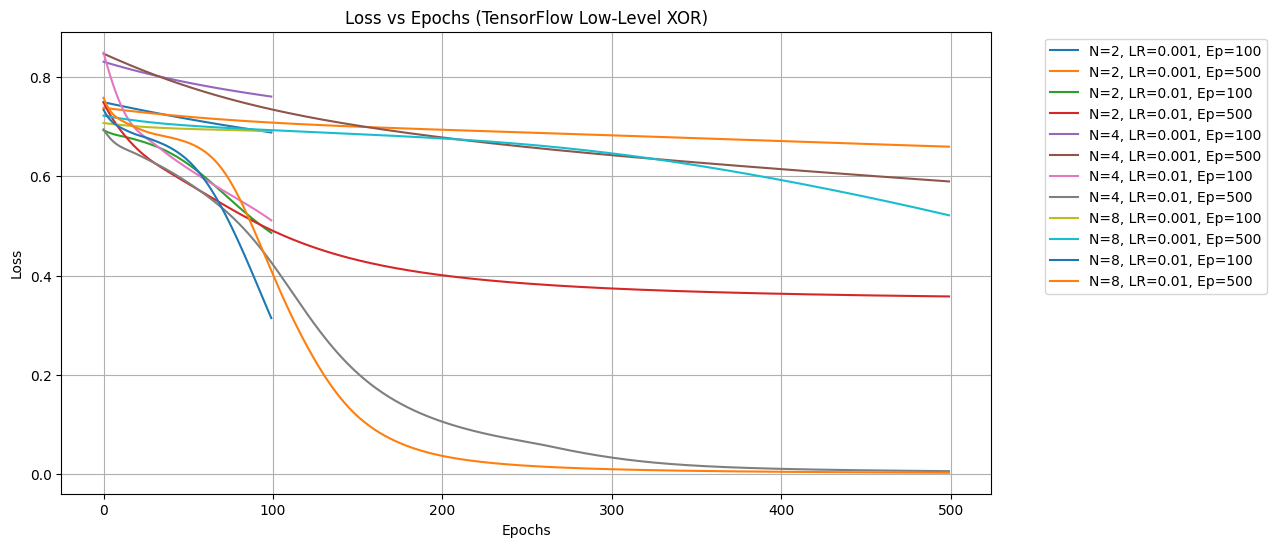

In [ ]:
plt.figure(figsize=(12,6))

for i in range(len(loss_histories)):
    plt.plot(loss_histories[i], label=labels[i])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (TensorFlow Low-Level XOR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


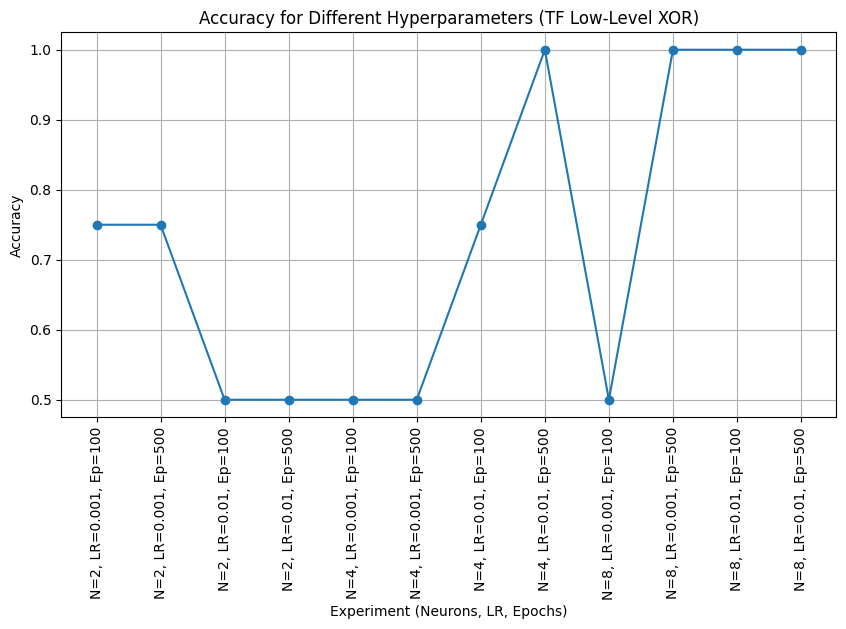

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(range(len(accuracies)), accuracies, marker='o')
plt.xticks(range(len(accuracies)), labels, rotation=90)
plt.xlabel("Experiment (Neurons, LR, Epochs)")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Hyperparameters (TF Low-Level XOR)")
plt.grid(True)
plt.show()


In [ ]:
print("\nSUMMARY:")
for i in range(len(labels)):
    print(f"{labels[i]} → Accuracy={accuracies[i]:.2f}")



SUMMARY:
N=2, LR=0.001, Ep=100 → Accuracy=0.75
N=2, LR=0.001, Ep=500 → Accuracy=0.75
N=2, LR=0.01, Ep=100 → Accuracy=0.50
N=2, LR=0.01, Ep=500 → Accuracy=0.50
N=4, LR=0.001, Ep=100 → Accuracy=0.50
N=4, LR=0.001, Ep=500 → Accuracy=0.50
N=4, LR=0.01, Ep=100 → Accuracy=0.75
N=4, LR=0.01, Ep=500 → Accuracy=1.00
N=8, LR=0.001, Ep=100 → Accuracy=0.50
N=8, LR=0.001, Ep=500 → Accuracy=1.00
N=8, LR=0.01, Ep=100 → Accuracy=1.00
N=8, LR=0.01, Ep=500 → Accuracy=1.00


In [ ]:


def plot_decision_boundary_tf(W1, b1, W2, b2, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(-0.5, 1.5, 400),
        np.linspace(-0.5, 1.5, 400)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tf = tf.constant(grid, dtype=tf.float32)

    # Forward pass (NO rounding)
    hidden = tf.nn.tanh(tf.matmul(grid_tf, W1) + b1)
    probs = tf.nn.sigmoid(tf.matmul(hidden, W2) + b2)

    Z = probs.numpy().reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)


    plt.scatter(
        X[:, 0], X[:, 1],
        c=y.flatten(),
        edgecolors='k',
        s=100
    )

    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title(title)
    plt.colorbar(label="Predicted Probability")
    plt.show()


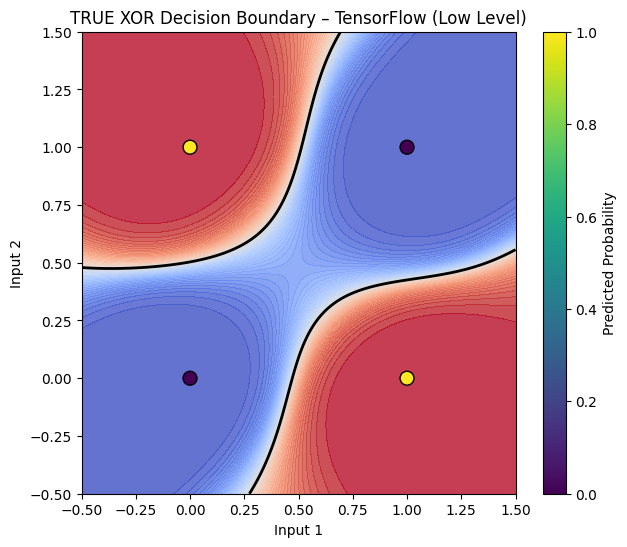

In [ ]:
plot_decision_boundary_tf(
    W1, b1, W2, b2,
    X,
    y,
    "TRUE XOR Decision Boundary – TensorFlow (Low Level)"
)
